# Домашная работа. Визуальный анализ.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём репозитории.

#### Полезная литература

- [Галерея графиков Matplotlib](https://matplotlib.org/gallery/index.html)
- [Галерея графиков Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Открытый курс машинного обучения. Тема 2: Визуализация данных c Python](https://habr.com/company/ods/blog/323210/)

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Визуальный анализ данных

В этом задании вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams.

In [ ]:
df = pd.read_csv("data/StudentsPerformance.csv.zip")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/StudentsPerformance.csv.zip'

## Задания
#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


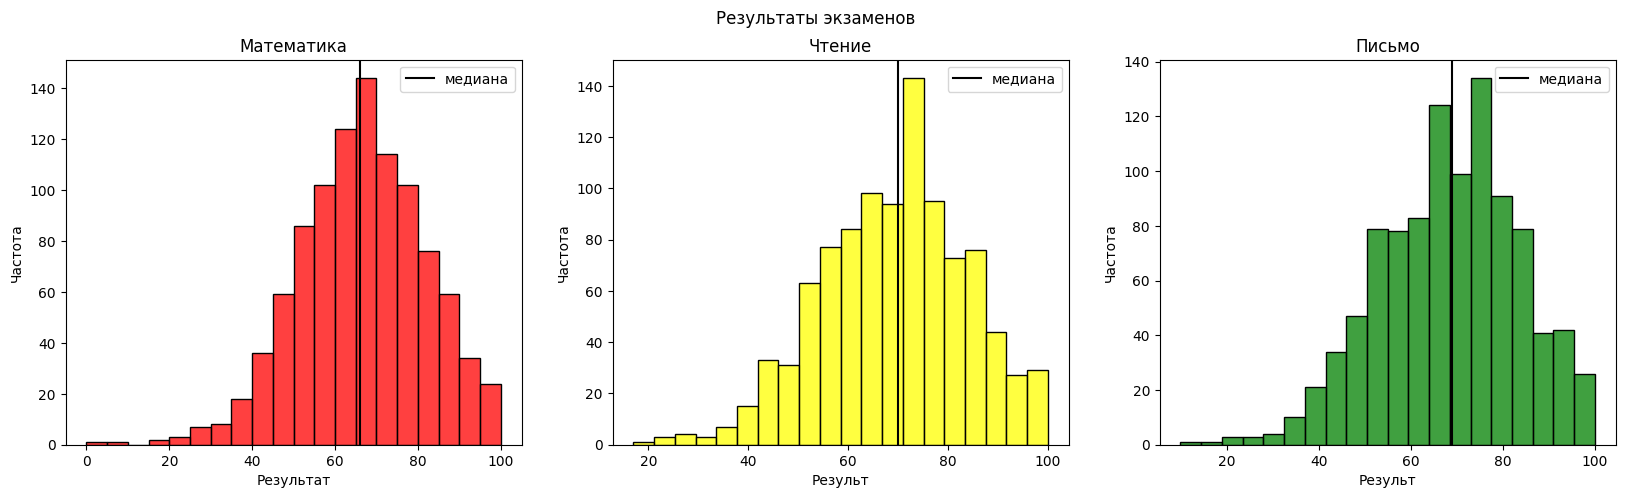

In [20]:
# можно было конечно сам файл загрузить в систему, но я нашёл файл в репозитории. Чтобы прочитать его через pd.read_csv(), нужно raw-версию открыть
df = pd.read_csv('https://raw.githubusercontent.com/NadavKiani/Students-Performance-in-Exams/refs/heads/master/StudentsPerformance.csv')

fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('Результаты экзаменов')

sns.histplot(df['math score'], bins=20, ax=axes[0], color='red')
axes[0].axvline(df['math score'].median(), color='black', linestyle='-', label='медиана')
axes[0].set_title('Математика')
axes[0].set_xlabel('Результат')
axes[0].set_ylabel('Частота')
axes[0].legend()

sns.histplot(df['reading score'], bins=20, ax=axes[1], color='yellow')
axes[1].axvline(df['reading score'].median(), color='black', linestyle='-', label='медиана')
axes[1].set_title('Чтение')
axes[1].set_xlabel('Результ')
axes[1].set_ylabel('Частота')
axes[1].legend()

sns.histplot(df['writing score'], bins=20, ax=axes[2], color='green')
axes[2].axvline(df['writing score'].median(), color='black', linestyle='-', label='медиана')
axes[2].set_title('Письмо')
axes[2].set_xlabel('Результ')
axes[2].set_ylabel('Частота')
axes[2].legend()

plt.show()


#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню?

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


<ipython-input-21-e39a61d09b9c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=meanMath.index, y=meanMath.values, palette="rocket")


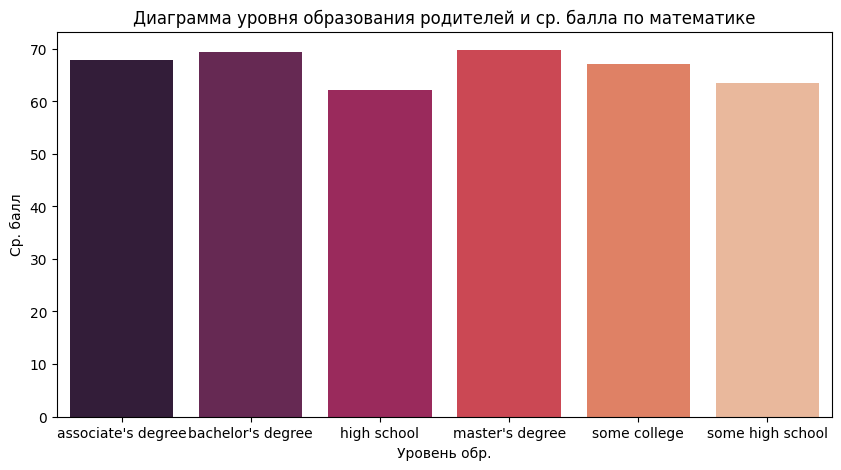

Уровни образования и кол-во строк для каждого уровня: 
parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


In [21]:
eduLevels = df['parental level of education'].value_counts()

meanMath = df.groupby('parental level of education')['math score'].mean()
plt.figure(figsize=(10, 5))

sns.barplot(x=meanMath.index, y=meanMath.values, palette="rocket")

plt.title('Диаграмма уровня образования родителей и ср. балла по математике')
plt.xlabel('Уровень обр.')
plt.ylabel('Ср. балл')
plt.show()

print("Уровни образования и кол-во строк для каждого уровня: ")
print(eduLevels)


Видно из графика: чем выше уровень образование родителей (masters degree/bachelors degree), тем выше средний балл их детей по математике

#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [22]:
girlsHigh = df[(df['gender'] == 'female') &
                    (df['math score'] > 90) &
                    (df['reading score'] > 90) &
                    (df['writing score'] > 90)]


print(girlsHigh.shape[0])

17


#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение


In [24]:
dataStud = df.groupby('gender').agg(
    minMath=('math score', 'min'),
    maxMath=('math score', 'max'),
    medianMath=('math score', 'median'),
    minReading=('reading score', 'min'),
    maxReading=('reading score', 'max'),
    medianReading=('reading score', 'median'),
    minWriting=('writing score', 'min'),
    maxWriting=('writing score', 'max'),
    medianWriting=('writing score', 'median')
)

print(dataStud)

        minMath  maxMath  medianMath  minReading  maxReading  medianReading  \
gender                                                                        
female        0      100        65.0          17         100           73.0   
male         27      100        69.0          23         100           66.0   

        minWriting  maxWriting  medianWriting  
gender                                         
female          10         100           74.0  
male            15         100           64.0  


#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола
###### (подсказка: используете agg())

In [34]:
score = df.groupby(['gender', 'lunch', 'test preparation course']).agg(
    avgMath=('math score', 'mean'),
    avgReading=('reading score', 'mean'),
    avgWriting=('writing score', 'mean')
)

print(score)

                                               avgMath  avgReading  avgWriting
gender lunch        test preparation course                                   
female free/reduced completed                60.785714   73.428571   74.371429
                    none                     52.890756   63.831933   61.781513
       standard     completed                71.131579   79.798246   81.508772
                    none                     66.530233   73.386047   72.967442
male   free/reduced completed                65.639344   65.786885   65.737705
                    none                     60.609524   59.076190   55.285714
       standard     completed                75.955752   72.601770   71.982301
                    none                     69.832512   64.719212   61.906404


стандартный ланч и завершенная подготовка показывают лучшие результаты по всем предметам по всем полам


#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы

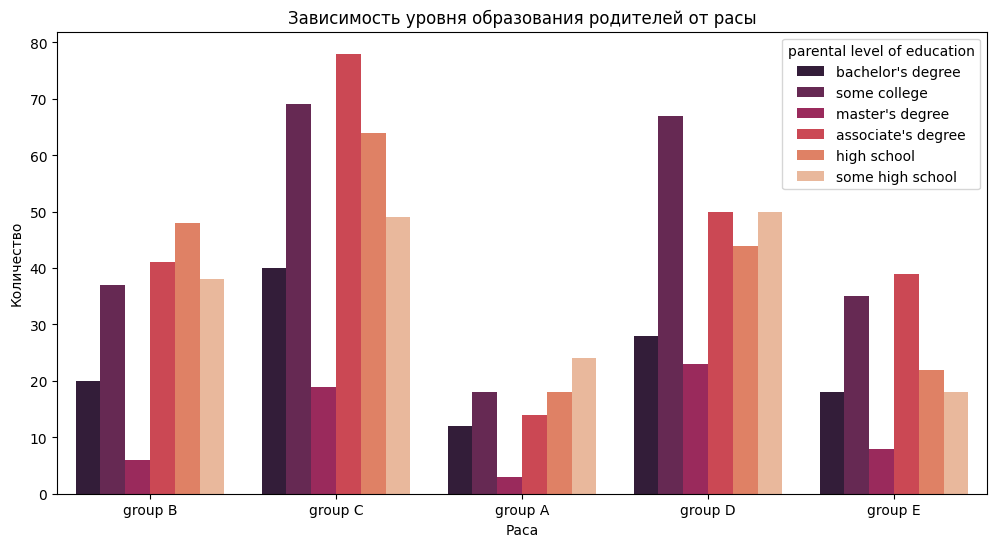

In [35]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='race/ethnicity', hue='parental level of education', palette='rocket')

plt.title('Зависимость уровня образования родителей от расы')
plt.xlabel('Раса')
plt.ylabel('Количество')
plt.show()

#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

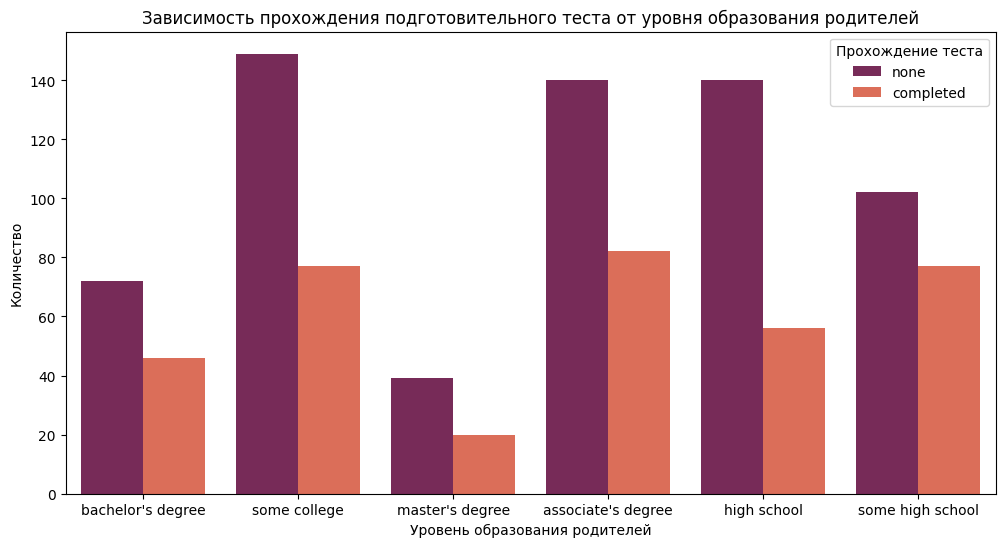

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='parental level of education', hue='test preparation course', palette='rocket')

plt.title('Зависимость прохождения подготовительного теста от уровня образования родителей')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Количество')
plt.legend(title='Прохождение теста')
plt.show()

дети, родители которых закончили только старшую школу, чаще ходят на курсы

#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

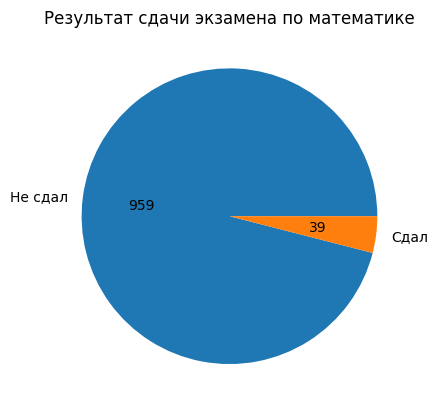

In [38]:
df['passedMath'] = df['math score'] >= 40
count = df['passedMath'].value_counts()

plt.figure()
plt.pie(count, labels=['Не сдал', 'Сдал'], autopct=lambda p: f'{int(p * sum(count) / 100)}')
plt.title('Результат сдачи экзамена по математике')
plt.show()

#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

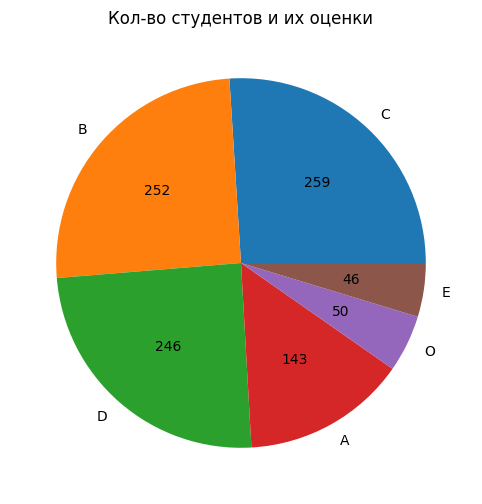

In [41]:
df['avgScore'] = (df['math score'] + df['reading score'] + df['writing score']) / 3
df['grade'] = 'E' # по умолч.
df.loc[(df['math score'] >= 40) & (df['avgScore'] > 40), 'grade'] = 'D'
df.loc[(df['math score'] >= 40) & (df['avgScore'] > 60), 'grade'] = 'C'
df.loc[(df['math score'] >= 40) & (df['avgScore'] > 70), 'grade'] = 'B'
df.loc[(df['math score'] >= 40) & (df['avgScore'] > 80), 'grade'] = 'A'
df.loc[(df['math score'] >= 40) & (df['avgScore'] > 90), 'grade'] = 'O'
# > 40 везде проверка, т.к. иначе E
count = df['grade'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(count, labels=count.index, autopct=lambda p: f'{int(p * sum(count) / 100)}')
plt.title('Кол-во студентов и их оценки')
plt.show()

#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В

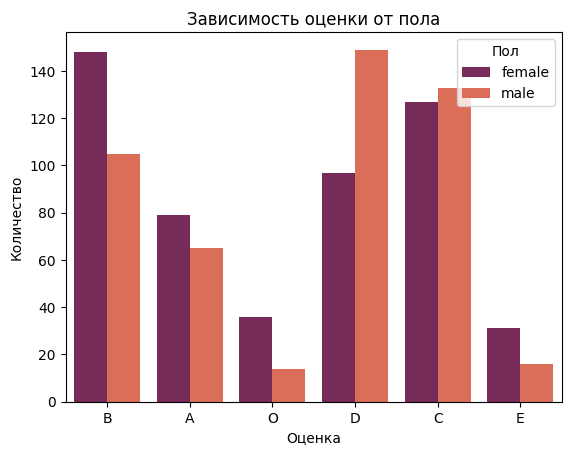

In [42]:
plt.figure()
sns.countplot(data=df, x='grade', hue='gender', palette='rocket')
plt.title('Зависимость оценки от пола')
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.legend(title='Пол')
plt.show()



Оценки B, A, O женщины получали чаще мужчин